# Project ( Investigate Prosper Loans Dataset to Predict Loan Status)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='intro'></a>
## Introduction
> In this Project, i will be Inspecting the ***Predictors of whether a Borrower will be able to Pay back a loan or Not***
 I will be asking simple and deatiled questions that will produce necessary answers and recomendations at the end of my analysis.
###### The Target variable i will comparing across most of the variables will be ***Loan Status***
##### Questions like
- Which Borrower has a better occupation
- What is the Income of a Borrower
- What is a Borrower's Record based on prior Ontime Payments?
- etc.

<a id='wrangling'></a>
## Wrangling
### Gather

In [2]:
#read the file into a dataframe
loans = pd.read_csv('prosperLoanData.csv')

### Assess

In [3]:
#inspect the first 5 rows
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#inspect the last 5 rows
loans.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
#get the dimension
loans.shape

(113937, 81)

> The dimension of the dataset shows that there are 113,937 observations and 81 features in this dataset.
Which simply means it is a large data set.

In [6]:
#programmatic inspection
loans.info

<bound method DataFrame.info of                      ListingKey  ListingNumber            ListingCreationDate  \
0       1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1       10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2       0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3       0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4       0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                         ...            ...                            ...   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000

In [7]:
#looking at all the columns
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

> Some of the obviously important columns are LoanStatus,Occupation,
EmploymentStatus,Term,EmploymentStatusDuration,
IsBorrowerHomeowner,OnTimeProsperPayments,StatedMonthlyIncome,
BorrowerRate,ProsperScore,ListingCategory,IncomeRange.

In [8]:
for i,v in enumerate(loans.columns):
    print(i,v)

0 ListingKey
1 ListingNumber
2 ListingCreationDate
3 CreditGrade
4 Term
5 LoanStatus
6 ClosedDate
7 BorrowerAPR
8 BorrowerRate
9 LenderYield
10 EstimatedEffectiveYield
11 EstimatedLoss
12 EstimatedReturn
13 ProsperRating (numeric)
14 ProsperRating (Alpha)
15 ProsperScore
16 ListingCategory (numeric)
17 BorrowerState
18 Occupation
19 EmploymentStatus
20 EmploymentStatusDuration
21 IsBorrowerHomeowner
22 CurrentlyInGroup
23 GroupKey
24 DateCreditPulled
25 CreditScoreRangeLower
26 CreditScoreRangeUpper
27 FirstRecordedCreditLine
28 CurrentCreditLines
29 OpenCreditLines
30 TotalCreditLinespast7years
31 OpenRevolvingAccounts
32 OpenRevolvingMonthlyPayment
33 InquiriesLast6Months
34 TotalInquiries
35 CurrentDelinquencies
36 AmountDelinquent
37 DelinquenciesLast7Years
38 PublicRecordsLast10Years
39 PublicRecordsLast12Months
40 RevolvingCreditBalance
41 BankcardUtilization
42 AvailableBankcardCredit
43 TotalTrades
44 TradesNeverDelinquent (percentage)
45 TradesOpenedLast6Months
46 DebtToIncome

###### Looking atmy columns from some little inspections i ran, we can group the varibles into three types
- Applicant Variables e.g occupation, Income employment details
- Loan features e.g Interest rate, Amount of loan, Loan Purpose
- Customer  behaviour(i.e behaviour after loan is generated) e.g


In [9]:
loans.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [10]:
loans[loans.isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#check the sum of missing numbers in each features
loans.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [12]:
#get the index
loans.index

RangeIndex(start=0, stop=113937, step=1)

In [13]:
#percentage of missing values in each column
round(loans.isnull().sum()/len(loans.index),2)*100

ListingKey                      0.0
ListingNumber                   0.0
ListingCreationDate             0.0
CreditGrade                    75.0
Term                            0.0
                               ... 
PercentFunded                   0.0
Recommendations                 0.0
InvestmentFromFriendsCount      0.0
InvestmentFromFriendsAmount     0.0
Investors                       0.0
Length: 81, dtype: float64

> although most of the columns is not seen well but we can see that a column has 75% missing numbers

In [14]:
#print out columns that that had more than 50% missing numbers
missing_columns=loans.columns[(loans.isnull().sum()/len(loans.index))*100>50]
missing_columns

Index(['CreditGrade', 'ClosedDate', 'GroupKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')

> These columns have more than 50% missing values and none or most of them are not part of the columns i really wanted to use for my analysis so i will be dealing with them by droppind them in the cleaning sextion

In [15]:
#let us check some of the entries of two columns which i suspected might be actually important
loans.loc[:,['OnTimeProsperPayments','TotalProsperLoans']].head()

,OnTimeProsperPayments,TotalProsperLoans
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,11.0,1.0


In [16]:
loans.duplicated().sum()

0

In [17]:
loans.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [18]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### The Strycture of The dataset
- This dataset has 113937 observations and 81 features. 
- Some data are obviously categorical/qualitative while some are quantitative
- There are some data quality issuses in this dataset like missing values, non descriptive features, irrelevant variables,
- wrong data types and even outliers which may affect my modelling as i will be building a model with the cleaned data later on.
- From the summary statistics , i can see that some of the numerical features are right skewed while some are left skewed, 
- I could also see that some features have a very large deviation from the standard.
 
### Main Features of interest of interest in my dataset
- Am interested in predicting If a Loan borrower will be able to pay back or not
- Am also interested in looking into the business aspect of this data by predicting if a loan borrower should still be borrowed money or not

In [19]:
loans['PublicRecordsLast12Months'].value_counts()

0.0     104941
1.0       1255
2.0         96
3.0         28
4.0         10
7.0          2
20.0         1
Name: PublicRecordsLast12Months, dtype: int64

## Data Quality Issues
##### prosperLoanData 
- Missing values in some features
- Some features have wrong Data types
- Some features are unnecessary and needs to be removed
- Some features are not well descriptive 


### Clean
- Use proper imputation methods to fill the missing values
- Remove or drop unnecessary features that will not be used for analysis
- Convert data types correctly
- Properly describe or rename some very important features

### Define
- Remove or drop  Columns that will not be used for analysis

### Code

In [20]:
#create a list for the columns to be dropped
to_be_dropped_loans=['ListingKey', 'ListingNumber','CreditGrade',
         'ClosedDate', 'BorrowerAPR', 
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 
       'ProsperScore',  
         'EmploymentStatusDuration',
        'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
        'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors','BorrowerState']
#use a drop function to drop the columns
loans.drop(to_be_dropped_loans, axis=1, inplace=True)


### Test

In [21]:
#check the first 5 rows
loans.head()

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,DelinquenciesLast7Years,StatedMonthlyIncome,LoanKey,OnTimeProsperPayments,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,36,Completed,0.1580,NaN,0,Other,Self-employed,True,4.0,3083.333333,E33A3400205839220442E84,NaN,9425
1,2014-02-27 08:28:07.900000000,36,Current,0.0920,A,2,Professional,Employed,False,0.0,6125.000000,9E3B37071505919926B1D82,NaN,10000
2,2007-01-05 15:00:47.090000000,36,Completed,0.2750,NaN,0,Other,Not available,False,0.0,2083.333333,6954337960046817851BCB2,NaN,3001
3,2012-10-22 11:02:35.010000000,36,Current,0.0974,A,16,Skilled Labor,Employed,True,14.0,2875.000000,A0393664465886295619C51,NaN,10000
4,2013-09-14 18:38:39.097000000,36,Current,0.2085,D,2,Executive,Employed,True,0.0,9583.333333,A180369302188889200689E,11.0,15000


In [22]:
#see the columns remaining columns
loans.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate',
       'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'DelinquenciesLast7Years',
       'StatedMonthlyIncome', 'LoanKey', 'OnTimeProsperPayments',
       'LoanOriginalAmount'],
      dtype='object')

In [23]:
#re inspect the features
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   DelinquenciesLast7Years    112947 non-null  float64
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanKey                    113937 non-null  object 
 12  OnTimeProsperPayments      22085 non-null   float64
 13  LoanOriginalAmount         11

In [24]:
#check the missing values again
loans.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
DelinquenciesLast7Years        990
StatedMonthlyIncome              0
LoanKey                          0
OnTimeProsperPayments        91852
LoanOriginalAmount               0
dtype: int64

In [25]:
#drop the features that do not have missing values
# so as to plot a bar chart of missing values
loans_drop_Not_missing=loans.drop(columns=['IsBorrowerHomeowner','ListingCreationDate','Term','LoanStatus','BorrowerRate',
                                         'ListingCategory (numeric)','StatedMonthlyIncome',
                                     'LoanKey','LoanOriginalAmount','ProsperRating (Alpha)'],axis=1).isna().sum()
print(loans_drop_Not_missing) 

Occupation                  3588
EmploymentStatus            2255
DelinquenciesLast7Years      990
OnTimeProsperPayments      91852
dtype: int64


C:\Users\512GB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


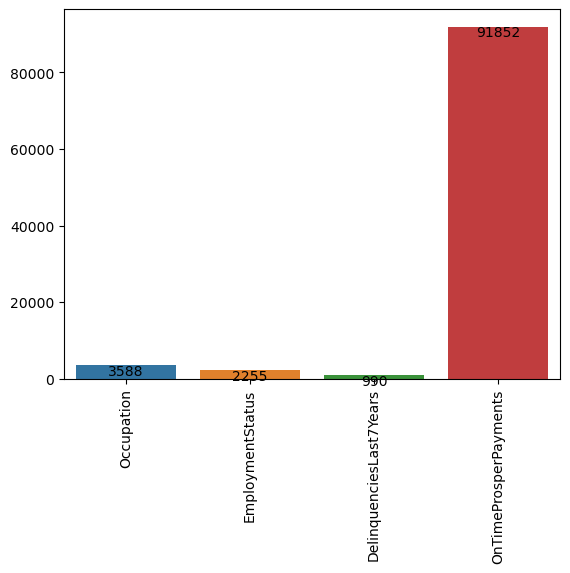

In [26]:

#Plot a graph of the missing values
sns.barplot(loans_drop_Not_missing.index.values, loans_drop_Not_missing)
#get the current tick locations and labels
plt.xticks(rotation=90)
#logic to print value on each bar
for i in range(loans_drop_Not_missing.shape[0]):
    count=loans_drop_Not_missing[i]
    
    plt.text(i, count+300, count, ha='center', va='top')

In [27]:
#check the data type of the features again
loans.dtypes

ListingCreationDate           object
Term                           int64
LoanStatus                    object
BorrowerRate                 float64
ProsperRating (Alpha)         object
ListingCategory (numeric)      int64
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
DelinquenciesLast7Years      float64
StatedMonthlyIncome          float64
LoanKey                       object
OnTimeProsperPayments        float64
LoanOriginalAmount             int64
dtype: object

In [28]:
loans.head()

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,DelinquenciesLast7Years,StatedMonthlyIncome,LoanKey,OnTimeProsperPayments,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,36,Completed,0.1580,NaN,0,Other,Self-employed,True,4.0,3083.333333,E33A3400205839220442E84,NaN,9425
1,2014-02-27 08:28:07.900000000,36,Current,0.0920,A,2,Professional,Employed,False,0.0,6125.000000,9E3B37071505919926B1D82,NaN,10000
2,2007-01-05 15:00:47.090000000,36,Completed,0.2750,NaN,0,Other,Not available,False,0.0,2083.333333,6954337960046817851BCB2,NaN,3001
3,2012-10-22 11:02:35.010000000,36,Current,0.0974,A,16,Skilled Labor,Employed,True,14.0,2875.000000,A0393664465886295619C51,NaN,10000
4,2013-09-14 18:38:39.097000000,36,Current,0.2085,D,2,Executive,Employed,True,0.0,9583.333333,A180369302188889200689E,11.0,15000


### Define
- Convert the data types accordingly

### Code

In [29]:
#convert the data type
loans['ListingCreationDate']=loans['ListingCreationDate'].astype('datetime64[ns]')

### Test

In [30]:
#comfirm the data type has been changed
loans.dtypes

ListingCreationDate          datetime64[ns]
Term                                  int64
LoanStatus                           object
BorrowerRate                        float64
ProsperRating (Alpha)                object
ListingCategory (numeric)             int64
Occupation                           object
EmploymentStatus                     object
IsBorrowerHomeowner                    bool
DelinquenciesLast7Years             float64
StatedMonthlyIncome                 float64
LoanKey                              object
OnTimeProsperPayments               float64
LoanOriginalAmount                    int64
dtype: object

### Define
- Fill in Missing values appropriately in:
- DelinquenciesLast7Years
- OnTimeProsperPayments

### Code

In [31]:
loans.head()

,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,DelinquenciesLast7Years,StatedMonthlyIncome,LoanKey,OnTimeProsperPayments,LoanOriginalAmount
0,2007-08-26 19:09:29.263,36,Completed,0.1580,NaN,0,Other,Self-employed,True,4.0,3083.333333,E33A3400205839220442E84,NaN,9425
1,2014-02-27 08:28:07.900,36,Current,0.0920,A,2,Professional,Employed,False,0.0,6125.000000,9E3B37071505919926B1D82,NaN,10000
2,2007-01-05 15:00:47.090,36,Completed,0.2750,NaN,0,Other,Not available,False,0.0,2083.333333,6954337960046817851BCB2,NaN,3001
3,2012-10-22 11:02:35.010,36,Current,0.0974,A,16,Skilled Labor,Employed,True,14.0,2875.000000,A0393664465886295619C51,NaN,10000
4,2013-09-14 18:38:39.097,36,Current,0.2085,D,2,Executive,Employed,True,0.0,9583.333333,A180369302188889200689E,11.0,15000


In [32]:
#check the values in this column
loans['DelinquenciesLast7Years'].value_counts()

0.0     76439
1.0      3967
3.0      3183
2.0      2879
4.0      2592
        ...  
97.0        4
85.0        3
94.0        3
98.0        3
93.0        2
Name: DelinquenciesLast7Years, Length: 100, dtype: int64

- I will be filling this column with the median positioin, because median is more preferrable so as not to be affected in occasions  where we have extreme data poins

In [33]:
#get the median of DelinquenciesLast7Years
median_D=loans['DelinquenciesLast7Years'].median()

In [34]:
#Fill DelinquenciesLast7Years with the median
loans['DelinquenciesLast7Years'].fillna(median_D, inplace=True)

### Test

In [35]:
#comfirm the features have no missing values
loans.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
DelinquenciesLast7Years          0
StatedMonthlyIncome              0
LoanKey                          0
OnTimeProsperPayments        91852
LoanOriginalAmount               0
dtype: int64

### Define
- Rename Columns

### Code

In [36]:
loans.rename(columns={'ListingCategory (numeric)':'Listing','ProsperRating (Alpha)':'Prosper_Rating',
                      'LoanOriginalAmount':'Amountof_Loan','ListingCreationDate':'Dateof_Listing',
                      'IsBorrowerHomeowner':'HomeOwner','StatedMonthlyIncome':'MonthlyIncome'}, inplace=True)


### Test

In [37]:
loans.columns

Index(['Dateof_Listing', 'Term', 'LoanStatus', 'BorrowerRate',
       'Prosper_Rating', 'Listing', 'Occupation', 'EmploymentStatus',
       'HomeOwner', 'DelinquenciesLast7Years', 'MonthlyIncome', 'LoanKey',
       'OnTimeProsperPayments', 'Amountof_Loan'],
      dtype='object')

In [38]:
loans_df=loans.copy()

### Define
- Convert Prosper_Rating to a categorical data

### Code

In [39]:
#convert Prosper_Rating to categorical variable
loans['Prosper_Rating'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: Prosper_Rating, dtype: int64

In [40]:
ordinal_var=['AA','A','B','C','D','E','HR']
ordered_var=pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var)
loans['Prosper_Rating']=loans['Prosper_Rating'].astype(ordered_var)

### Test

In [41]:
loans.dtypes

Dateof_Listing             datetime64[ns]
Term                                int64
LoanStatus                         object
BorrowerRate                      float64
Prosper_Rating                   category
Listing                             int64
Occupation                         object
EmploymentStatus                   object
HomeOwner                            bool
DelinquenciesLast7Years           float64
MonthlyIncome                     float64
LoanKey                            object
OnTimeProsperPayments             float64
Amountof_Loan                       int64
dtype: object

In [42]:
loans.isnull().sum()

Dateof_Listing                 0
Term                           0
LoanStatus                     0
BorrowerRate                   0
Prosper_Rating             29084
Listing                        0
Occupation                  3588
EmploymentStatus            2255
HomeOwner                      0
DelinquenciesLast7Years        0
MonthlyIncome                  0
LoanKey                        0
OnTimeProsperPayments      91852
Amountof_Loan                  0
dtype: int64

### Define
- Fill the missing values in Occupation with 'No_occupation'

### Code

In [43]:
#repalce the missing values in Occupation with np.nap
#since the missing values might not be removeable by ordinary  means
loans['Occupation']=loans['Occupation'].fillna('No_occupation')


### Test

In [44]:
loans.isnull().sum()

Dateof_Listing                 0
Term                           0
LoanStatus                     0
BorrowerRate                   0
Prosper_Rating             29084
Listing                        0
Occupation                     0
EmploymentStatus            2255
HomeOwner                      0
DelinquenciesLast7Years        0
MonthlyIncome                  0
LoanKey                        0
OnTimeProsperPayments      91852
Amountof_Loan                  0
dtype: int64

### Define
###### Create a dataframe to extract only observations where there are no missing values in
- Prosper_Rating
- EmploymentStatus
- OnTimeProsperPayments

### Code

In [45]:
#create a dataframe where there are no missing values in OnTimeProsperPayments,Prosper_Rating and EmploymentStatus
Loans_Clean=loans[loans['Prosper_Rating'].notnull() & loans['EmploymentStatus'].notnull() & 
                  loans['OnTimeProsperPayments'].notnull()]

### Test

In [46]:
#comfirm there is no missing values
Loans_Clean.isnull().sum()

Dateof_Listing             0
Term                       0
LoanStatus                 0
BorrowerRate               0
Prosper_Rating             0
Listing                    0
Occupation                 0
EmploymentStatus           0
HomeOwner                  0
DelinquenciesLast7Years    0
MonthlyIncome              0
LoanKey                    0
OnTimeProsperPayments      0
Amountof_Loan              0
dtype: int64

In [47]:
#Check that there are no duplicates
Loans_Clean.duplicated().sum()

162

### Define
- Remove the duplicates

### Code

In [48]:
#drop the duplicates
Loans_Clean.drop_duplicates(inplace=True)

C:\Users\512GB\AppData\Local\Temp\ipykernel_14504\3981141329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loans_Clean.drop_duplicates(inplace=True)


### Test

In [49]:
#comfirm the duplicates are removed
Loans_Clean.duplicated().sum()

0

In [50]:
#plot the summary statistics of the new data set
Loans_Clean.describe()

,Term,BorrowerRate,Listing,DelinquenciesLast7Years,MonthlyIncome,OnTimeProsperPayments,Amountof_Loan
count,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000,19635.000000
mean,42.220321,0.191520,3.685918,3.645022,5941.546235,23.597606,7848.634428
std,11.749904,0.077983,4.571448,8.957302,4275.042716,19.354896,5385.781852
min,12.000000,0.040000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,36.000000,0.126900,1.000000,0.000000,3466.666667,9.000000,4000.000000
50%,36.000000,0.185200,1.000000,0.000000,5000.000000,17.000000,6350.000000
75%,60.000000,0.255700,6.000000,2.000000,7250.000000,34.000000,10790.500000
max,60.000000,0.360000,20.000000,99.000000,150000.000000,141.000000,35000.000000


<AxesSubplot:>

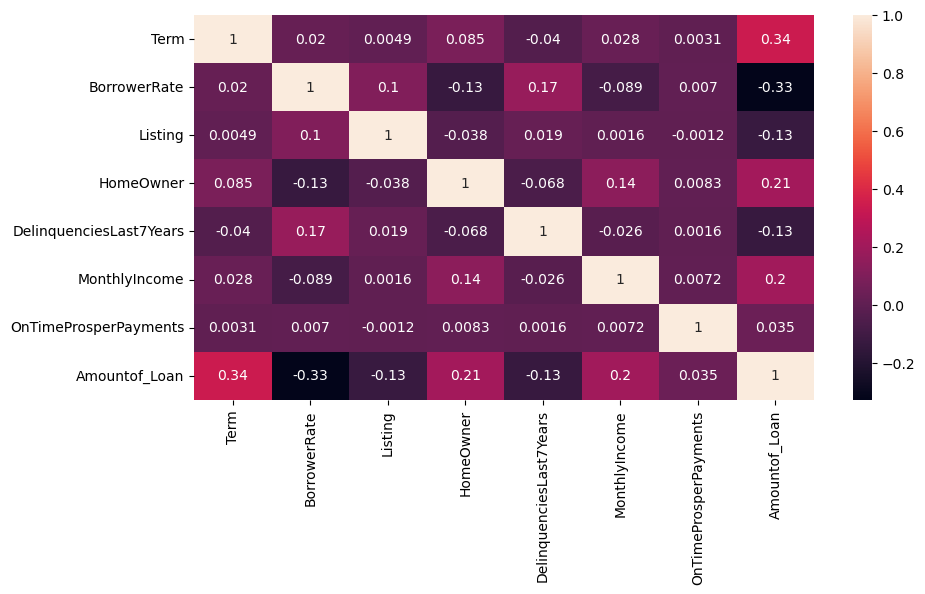

In [51]:
#let me check the relation ship between each features
plt.figure(figsize=[10,5])
sns.heatmap(loans.corr(), annot=True)

<a id='eda'></a>
## Exploratory  Data Analysis

### Univariate Exploration

In [52]:
Loans_Clean.head()

,Dateof_Listing,Term,LoanStatus,BorrowerRate,Prosper_Rating,Listing,Occupation,EmploymentStatus,HomeOwner,DelinquenciesLast7Years,MonthlyIncome,LoanKey,OnTimeProsperPayments,Amountof_Loan
4,2013-09-14 18:38:39.097,36,Current,0.2085,D,2,Executive,Employed,True,0.0,9583.333333,A180369302188889200689E,11.0,15000
16,2013-07-16 12:42:48.680,60,Current,0.2809,E,6,Professional,Full-time,True,12.0,8291.666667,2C78368704199057024A715,67.0,4000
19,2013-08-21 06:49:02.093,60,Current,0.2225,D,1,Laborer,Employed,False,0.0,3075.000000,A02836960150183071E32AD,12.0,6500
33,2010-10-10 13:23:30.757,36,Completed,0.0785,AA,7,Other,Employed,False,0.0,13083.333333,91E0360126027167265496D,8.0,16000
47,2013-05-01 08:18:59.183,36,Current,0.1299,A,1,Professional,Employed,True,0.0,5416.666667,76BB3680997666469826273,20.0,15000


### Question1 (What Employment Status of the Borrowers  has the Highest Percentage?)

In [53]:
n_loan=Loans_Clean['EmploymentStatus'].value_counts().sum()
max_loan_count=Loans_Clean['EmploymentStatus'].value_counts()[0]
max_loan_prop=max_loan_count/n_loan
print(max_loan_prop)

0.6628978864272982


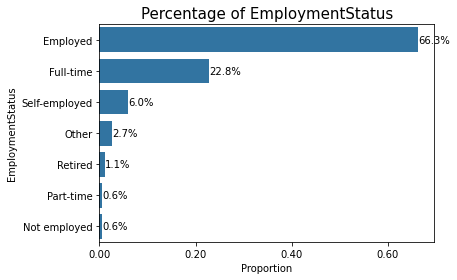

In [54]:
n_loan=Loans_Clean['EmploymentStatus'].value_counts().sum()
max_loan_count=Loans_Clean['EmploymentStatus'].value_counts()[0]
max_loan_prop=max_loan_count/n_loan
tick_props=np.arange(0,max_loan_prop,0.20 )
tick_name=['{:0.2f}'.format(v) for v in tick_props]

base_color=sns.color_palette()[0]
type_order=Loans_Clean['EmploymentStatus'].value_counts().index
sns.countplot(data=Loans_Clean, y='EmploymentStatus', color=base_color, order=type_order)
plt.xticks(tick_props*n_loan, tick_name)
plt.title('Percentage of EmploymentStatus', fontsize=15);


for i in range(Loans_Clean['EmploymentStatus'].value_counts().shape[0]):
    count=Loans_Clean['EmploymentStatus'].value_counts()[i]
    pct_string='{:0.1f}%'.format(100*count/n_loan)
    plt.text(count+1,i,pct_string, va='center')
    plt.xlabel('Proportion')

- 66.3 percent of the Borrowers are employed and it is seen that there are larger percentage of Loan borrowers who are  employed
- There 0.6 perecnt of Borrowers who are not employed
###### Hence, Most of the Borrowers are Employed, While very little amount of them are not employed at all.

## Question 2 (What is the Distribution DelinquenciesLast7Years and OnTimeProsperPayments of Borrowers?)

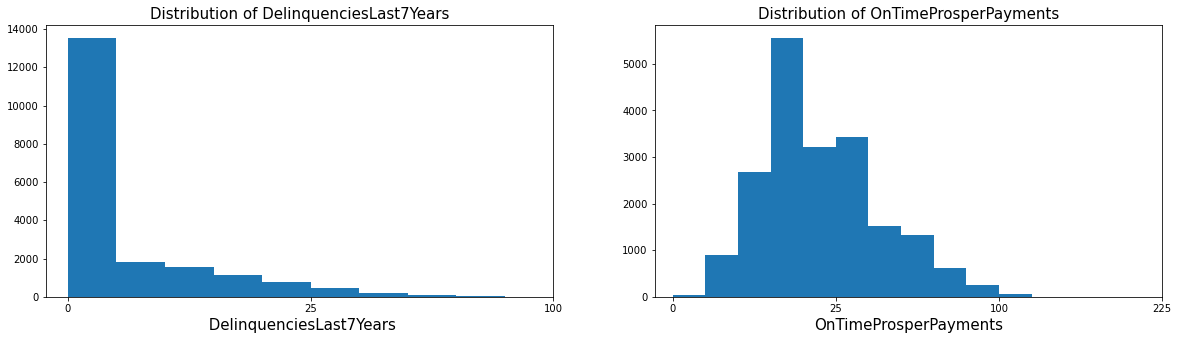

In [55]:
def sqrt_trans(x, inverse=False):
    """ transformation helper function"""
    if not inverse:
        return np.sqrt(x)
    else:
        return x**2
    
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
#bin resizing, to transform the x-axis
bin_edges=np.arange(0, sqrt_trans(Loans_Clean['DelinquenciesLast7Years'].max()+1),1)
#plot the scaled data
plt.hist(Loans_Clean['DelinquenciesLast7Years'].apply(sqrt_trans), bins=bin_edges)
#set the tick locations
tick_locs=np.arange(0, sqrt_trans(Loans_Clean['DelinquenciesLast7Years'].max())+5, 5)
#apply the x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse=True).astype(int))
plt.xlabel(' DelinquenciesLast7Years',fontsize=15)
plt.title('Distribution of DelinquenciesLast7Years', fontsize=15);

plt.subplot(1,2,2)
#bin resizing, to transform the x-axis
bin_edges=np.arange(0, sqrt_trans(Loans_Clean['OnTimeProsperPayments'].max()+1),1)
#plot the scaled data
plt.hist(Loans_Clean['OnTimeProsperPayments'].apply(sqrt_trans), bins=bin_edges)
#set the tick locations
tick_locs=np.arange(0, sqrt_trans(Loans_Clean['OnTimeProsperPayments'].max())+5, 5)
#apply the x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse=True).astype(int))
plt.xlabel('OnTimeProsperPayments', fontsize=15)
plt.title('Distribution of OnTimeProsperPayments', fontsize=15);

- From the distribution plot of the delinquency of last seven years, the histogram is right skilled with its highest bar above and below 12000 and 14000 counts. Lots of delinquencies of last seven years are have low distribution  between 5 and 25, and very low distribution between 25 and 100.

- The distribution plot of On time Prosper Payments is Uni modal with its highest peak at 20. It is obviously right skilled with its mean greater than the median. It has very low On time Payments at the extreme left and right side of the histogram

### Question 3 (What  is the Highest Loan Status of Borrowers?)

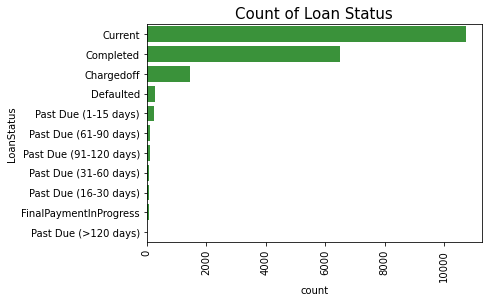

In [56]:
#create a figure object
fig=plt.figure()
#set the scale dimension
ax=fig.add_axes([.125,.125,.775,.755])
#inedx the 3rd color
base_color=sns.color_palette()[2]
#get the order of the Loan Status
status_order=Loans_Clean['LoanStatus'].value_counts().index
#plot the bar chart
sns.countplot(data=Loans_Clean, y='LoanStatus', color=base_color, order=status_order, ax=ax)
#set the location of the x axes
plt.xticks(rotation=90)
plt.title('Count of Loan Status', fontsize=15);

- From the Bar chart above, Borrowers with Current Loan Status have the highest count, followed by Borrowers who have completed their payments.
- From Borrowers who have loan status that is charged off down till those whose loan has past 120 days have the least count.

In [57]:
Loans_Clean.head(3)

,Dateof_Listing,Term,LoanStatus,BorrowerRate,Prosper_Rating,Listing,Occupation,EmploymentStatus,HomeOwner,DelinquenciesLast7Years,MonthlyIncome,LoanKey,OnTimeProsperPayments,Amountof_Loan
4,2013-09-14 18:38:39.097,36,Current,0.2085,D,2,Executive,Employed,True,0.0,9583.333333,A180369302188889200689E,11.0,15000
16,2013-07-16 12:42:48.680,60,Current,0.2809,E,6,Professional,Full-time,True,12.0,8291.666667,2C78368704199057024A715,67.0,4000
19,2013-08-21 06:49:02.093,60,Current,0.2225,D,1,Laborer,Employed,False,0.0,3075.000000,A02836960150183071E32AD,12.0,6500


### Question 4 (How many of the Borrowers are Home Owners?)

In [58]:
Loans_Clean['HomeOwner'].value_counts()

True     10450
False     9185
Name: HomeOwner, dtype: int64

Text(0.5, 1.0, 'Count of Home Owners')

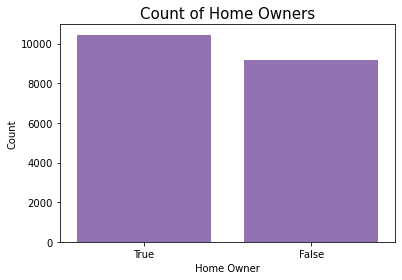

In [59]:
type_order=Loans_Clean['HomeOwner'].value_counts().index
base_color=sns.color_palette()[4]
sns.countplot(data=Loans_Clean, x='HomeOwner', order=type_order, color=base_color)
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.title('Count of Home Owners', fontsize=15)

- Obviously, Loan Borrowers Who have Homes have Count above 10000 and those who have no House are above 8000 but lesser than 10000.

### Question 5 ( What is the Distribution of Monthly Income and Amount of Loan of Borrowers)

In [60]:
(Loans_Clean['MonthlyIncome'].describe())

count     19635.000000
mean       5941.546235
std        4275.042716
min           0.000000
25%        3466.666667
50%        5000.000000
75%        7250.000000
max      150000.000000
Name: MonthlyIncome, dtype: float64

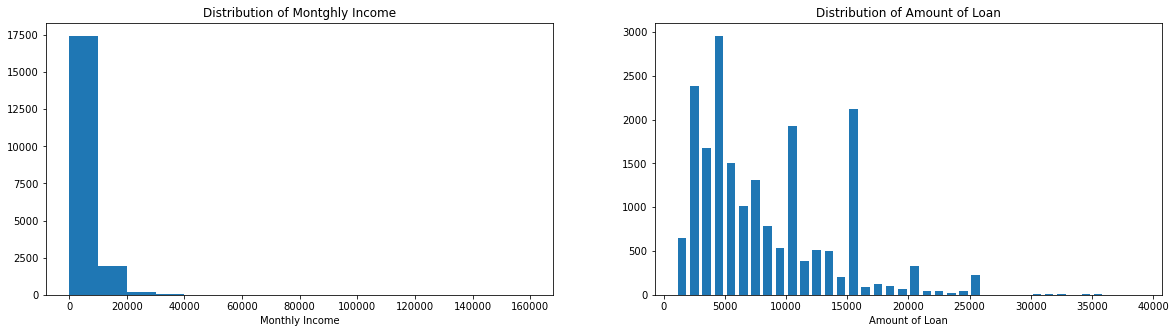

In [61]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
binz=np.arange(0, Loans_Clean['MonthlyIncome'].max()+20000,10000)
plt.hist(Loans_Clean['MonthlyIncome'], bins=binz)
plt.title('Distribution of Montghly Income')
plt.xlabel('Monthly Income');


plt.subplot(1,2,2)
bins=np.arange(1000, 35000+5000,1000)
plt.hist(Loans_Clean['Amountof_Loan'], bins=bins, rwidth=0.7)
plt.title('Distribution of Amount of Loan')
plt.xlabel('Amount of Loan');


- The Distribution of Monthly Income is right skewed with its mean higher than the median.
- Most of the Monthly Income is between 0 and lesser than 40000
- between 0 and 10000 have the highest count and low counts between 0 and 2500.

- The Distribution of The Amount of Loan is right skewed with an highst peak at 5000 and very lower Amonut of Loans between (15000 , 20000), (20000,25000) and values from 30000 are obviously outliers.

## Observations From Univariate Exploration
> For the first countplot , i had to use Percentage and proporion so that i will have a clearer ananysis of each employment status of borrowers. while for the distribution plot of Delinquency of last seven years and on time payment i used a function that deals with the negaitve values i had when i first plotted the graph which really affected my analysis.
In the third plot where i used a count plot, it is quite clear that instead of proportion i used count to reveal that "Current" loan status has the highest count, which means that most loan borrowers are still paying their loans currently.
From the count plot of home owners, it is much more obvious that  most of the loan borrowers are home owners but we cannot conclude that this will have any significat effect on if a borrower will be able to pay back or not or if a borrower should be given money again.
The last distribution plot here, i used a width gap of 0.7 for the distribution of amount of loan so that i can have distinguished bars for cleares analysis. and this made me see that Loan Amounts above 30000 are clearly outliers


### Bivariate Exploration

### Question 6 (What is the Relationship between Loan term and amount of Loan)

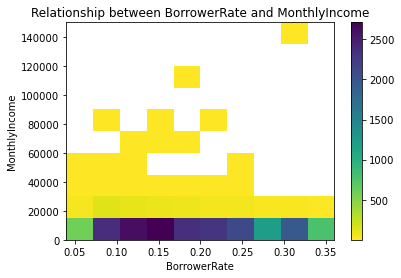

In [62]:
plt.hist2d(data=Loans_Clean, x='BorrowerRate', y='MonthlyIncome', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Relationship between BorrowerRate and MonthlyIncome')
plt.xlabel('BorrowerRate')
plt.ylabel('MonthlyIncome');

- The Heat Map above uses color to show high and low correlation respectively.
- Strong yellow colors were showing higher correlations but i reversed it so that darker colors show higher relationship.
- there is strongest relationships between Monthly Income below 20000 and Borrower Rate of 0.15

### Question 7 (Which Loan Status has the highest Average Monthly Income?)

In [64]:
Loans_Clean['LoanStatus'].value_counts()

Current                   10725
Completed                  6490
Chargedoff                 1466
Defaulted                   291
Past Due (1-15 days)        247
Past Due (61-90 days)        97
Past Due (91-120 days)       93
Past Due (31-60 days)        86
Past Due (16-30 days)        74
FinalPaymentInProgress       61
Past Due (>120 days)          5
Name: LoanStatus, dtype: int64

In [65]:
Loans_Clean.groupby('LoanStatus')['MonthlyIncome'].mean()

LoanStatus
Chargedoff                4764.557356
Completed                 5702.522483
Current                   6304.812121
Defaulted                 4479.290664
FinalPaymentInProgress    6758.685792
Past Due (1-15 days)      5742.642038
Past Due (16-30 days)     6063.824324
Past Due (31-60 days)     6052.973837
Past Due (61-90 days)     5235.192440
Past Due (91-120 days)    4510.232079
Past Due (>120 days)      3641.666667
Name: MonthlyIncome, dtype: float64

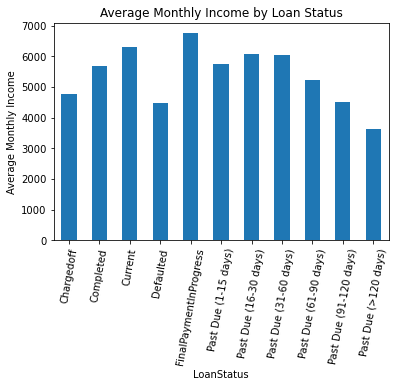

In [66]:
Loans_Clean.groupby('LoanStatus')['MonthlyIncome'].mean().plot(kind='bar')
plt.xticks(rotation=80)
plt.xlabel('LoanStatus')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income by Loan Status');

- Obviously Borrowers with Loan Status of Fianl Payment In progress have the highest  Average monthly Income which is above 6500, while Borrowers with Loan Status of Past Due (>120 days) have the Least Average Monthly Income which is below 4000.

### Question 8 ( Are there differences in the types of Loan Status based on Rating?)

In [67]:
Loan_categories=['AA','A','B','C','D','HR','E']
Loan_Rating=pd.api.types.CategoricalDtype(ordered=True, categories=Loan_categories)
Loans_Clean['Prosper_Rating']=Loans_Clean['Prosper_Rating'].astype(Loan_Rating)

C:\Users\USER\AppData\Local\Temp/ipykernel_2868/3543860765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loans_Clean['Prosper_Rating']=Loans_Clean['Prosper_Rating'].astype(Loan_Rating)


In [68]:
Loans_Clean['LoanStatus'].value_counts()

Current                   10725
Completed                  6490
Chargedoff                 1466
Defaulted                   291
Past Due (1-15 days)        247
Past Due (61-90 days)        97
Past Due (91-120 days)       93
Past Due (31-60 days)        86
Past Due (16-30 days)        74
FinalPaymentInProgress       61
Past Due (>120 days)          5
Name: LoanStatus, dtype: int64

In [69]:
#am working with just the four ratings with high frequencies
#create a new dataframe for this ratings
Loan_df=Loans_Clean[Loans_Clean['LoanStatus'].isin(['Current','Completed'])]

In [70]:
#use a groupby function to produce a pandas series
loan_count=Loan_df.groupby(['Prosper_Rating','LoanStatus']).size()
loan_count1=loan_count.reset_index(name='count')
loan_count2=loan_count1.pivot(index='Prosper_Rating', columns='LoanStatus', values='count')
loan_count2

LoanStatus,Completed,Current
Prosper_Rating,,
AA,467,865
A,1319,2812
B,818,2200
C,989,2068
D,1269,1485
HR,680,302
E,948,993


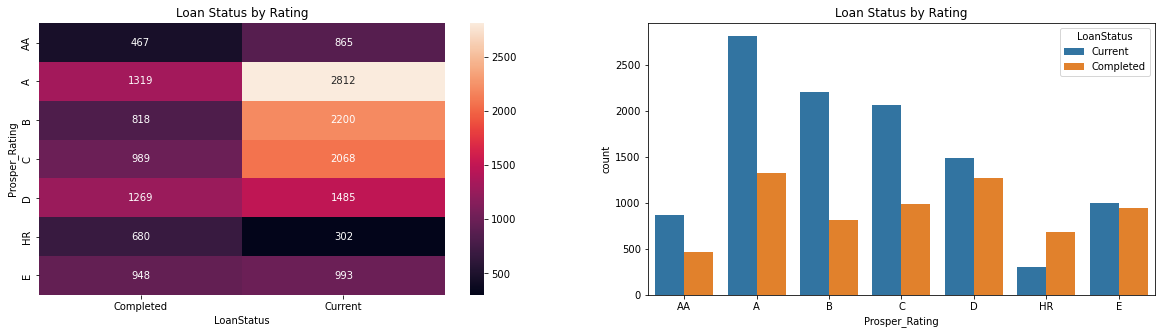

In [71]:
#create a figure object
plt.figure(figsize=[20,5])

#subplot1
plt.subplot(1,2,1)
sns.heatmap(loan_count2, annot=True, fmt='d')
plt.title('Loan Status by Rating')

plt.subplot(1,2,2)
sns.countplot(data=Loan_df, x='Prosper_Rating', hue='LoanStatus')
plt.title('Loan Status by Rating');




- Looking at the Heat Map on the left side between Prosper rating and Loan Status. I have streamlined the Loan Status to those who have completed and still currently paying alone.
- There is a stronger correlation between borrowers who have not completed their loans and Rating of A, followed by those who are currently paying and with Rating of B. Least relationship ios between Borrowers who are still currently paying and with a rating of HR 

### Question 9 (What is the Relationship between  Loan Status and Interest on amount borrowed?)

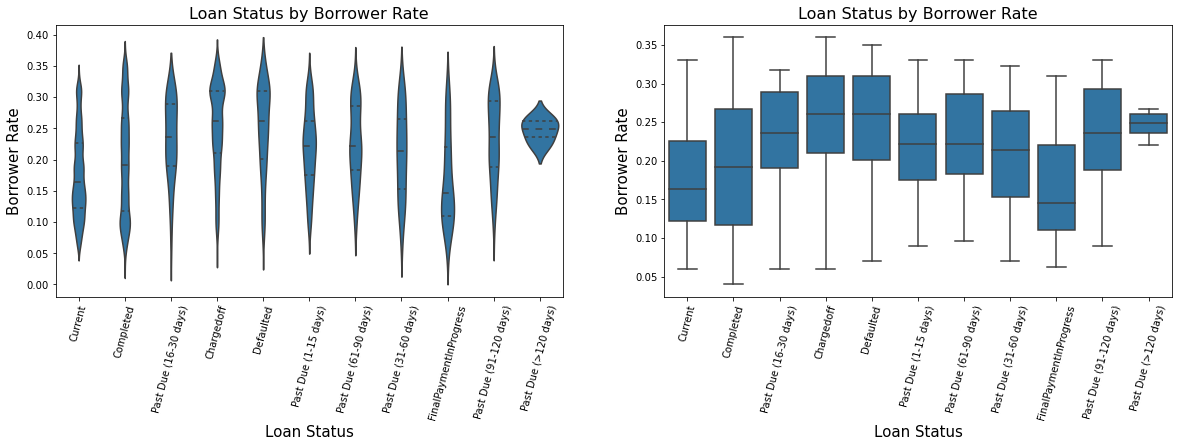

In [72]:
plt.figure(figsize=[20,5])
base_color=sns.color_palette()[0]

plt.subplot(1,2,1)
sns.violinplot(data=Loans_Clean, x='LoanStatus', y='BorrowerRate', inner='quartile', color=base_color)
plt.xticks(rotation=75)
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Borrower Rate', fontsize=15)
plt.title('Loan Status by Borrower Rate', fontsize=16)

plt.subplot(1,2,2)
sns.boxplot(data=Loans_Clean, x='LoanStatus', y='BorrowerRate',color=base_color)
plt.xticks(rotation=75)
plt.ylabel('Borrower Rate', fontsize=15)
plt.xlabel('Loan Status',fontsize=15)
plt.title('Loan Status by Borrower Rate', fontsize=16);

- The Defaulted Loan Status have the highest Median Borrower Rate while Past Due(>120 days) have a more curved distribution at the left and right ends.

- More than 50% of Current Loan Status had an interest rate above 0.2 
- More than 50% of Borrowers that have completed their loan had interest rate above 0.15
- Chargedoff and Defaulted have the same median rate between between 0.25 and 0.30

## Question 10()

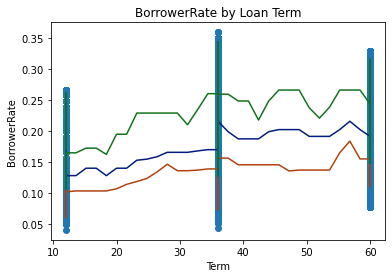

In [84]:
df_window=Loans_Clean.sort_values('Term').rolling(15)
x_windowmean=df_window['Term'].mean()
y_median=df_window['BorrowerRate'].median()
y_q1=df_window['BorrowerRate'].quantile(.25)
y_q3=df_window['BorrowerRate'].quantile(.75)

base_color=sns.color_palette()[0]
line_color=sns.color_palette('dark')[0]
line_color1=sns.color_palette('dark')[1]
line_color2=sns.color_palette('dark')[2]

plt.scatter(data=Loans_Clean, x='Term', y='BorrowerRate')
plt.errorbar(x=x_windowmean, y=y_median, color=line_color)
plt.errorbar(x=x_windowmean, y=y_q1, color=line_color1)
plt.errorbar(x=x_windowmean, y=y_q3, color=line_color2)

plt.xlabel('Term')
plt.ylabel('BorrowerRate')
plt.title('BorrowerRate by Loan Term');

- The median Borrower Rate occurs between 0.10 and 0.20
- The first quartile is between 0.10 and 0.15
- The quartile is between 0.05 to 0.10

## Observations From Bivariate Exploration
> From the first plot where i used an heat map to show relationship between borrower rate and monthly income, the colorpalette i used here is the sequential(viridis to be precise), i applied a reverse direction to the colorbar so that darker regions can show stronger relationships between my variables.
two plots after the heatmap, i used groupby class to group the loan status by avergare monthly income so that i can know which of the loan status where borrowers have the highest and lowest average monthly income respectively, obviously it was the those with Loan status of "Final Payment in Progress" who had the highest average monthly income
In the next plot where i plotted a heat map beside a barchart to show relationship between  the Prosper Rating and Those who have completed and currently paying loans.Here the darker color shows little or no particluar relationship while the lighest color shows strongest relationship, obviously from the heat map, there is a very strong relationship at rating A and Current Loan status. while looking carefully at the barchart it is also clear that borrowers who are still current paying their loans are more than those who have completed it for ratings (AA,A,B,C,D,E, but HR is the only exception with just a very little gap between the bars.
I intentionally plotted a violin plot beside a box plot so that the distribution and exploration will be more detailed for proper analysis, Those with Loan status of Chargedoff and defaulted have the highest borrower rating, while Current and Final Payments in Progress have the least.


## Multivariate Analysis

## Question 11 (What is the relationship between Amount of loan, Monthly Income and Loan Status?)

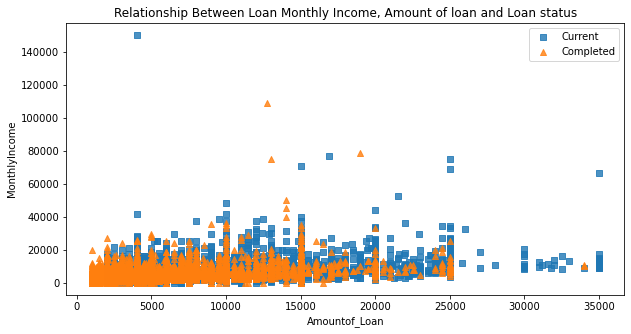

In [74]:
#LoanStatus MonthlyIncome Amountof_Loan
#np.random.seed(2018)
plt.figure(figsize=[10,5])
two_status_df=Loans_Clean[Loans_Clean['LoanStatus'].isin(['Current','Completed'])]
Loan_markers=[['Current','s'],['Completed','^']]

for ltype, markers in Loan_markers:
    Loan_df=two_status_df[two_status_df['LoanStatus']==ltype]
    sns.regplot(data=Loan_df, x='Amountof_Loan', y='MonthlyIncome', x_jitter=0.04, fit_reg=False, marker=markers)
plt.xlabel('Amountof_Loan')
plt.ylabel('MonthlyIncome')
plt.title('Relationship Between Loan Monthly Income, Amount of loan and Loan status')
plt.legend(['Current','Completed']);

- Borrowers who have completed their loan are more concentrated between 0 and 15000, with monthly income of most likely at most 40000, there are also outliers above 60000 for those who have completed their payment.
- Borrowers who are still currently paying their loan are also with more concentrated amount of loan between 0 to 25000 while there seems to be one or more outliers arount 35000 amount of loan, there is also a very obvious outlier at amount of loan between 0 and 5000 with monthly income above 140000

## Question 12 (What is the Relationship between Monthly Income, Amount of Loan and Deliquency of Last 7 years?)

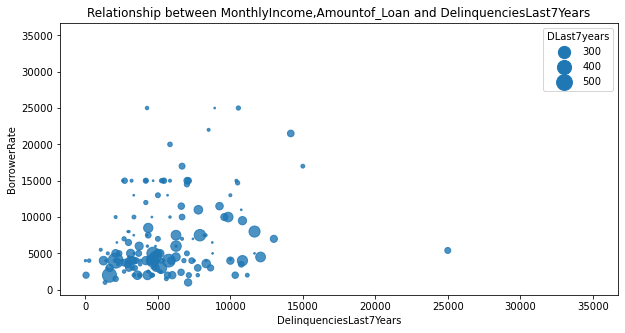

In [85]:
plt.figure(figsize=[10,5])

np.random.seed(2018)
sample= np.random.choice(Loans_Clean.shape[0], 500, replace=False)
Loan_data=Loans_Clean.iloc[sample]

sns.regplot(data=Loan_data, x='MonthlyIncome', y='Amountof_Loan', x_jitter=0.04, fit_reg=False, 
                   scatter_kws={'s':Loan_data['DelinquenciesLast7Years']*3}, color=base_color)
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('BorrowerRate')

sizes=[300,400,500]
base_color=sns.color_palette()[0]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2, color=base_color))
plt.legend(legend_obj, sizes, title= 'DLast7years')
plt.title('Relationship between MonthlyIncome,Amountof_Loan and DelinquenciesLast7Years');

- More Borrowers with Higher delinquency of last seven years is most likely between 0 and 10000  and most interest rating is not above 10000.
- The next level of delinquency of last seven years seems to exceed 10000 a bit
- Delinqyency of last  seven years has some obvious outliers with borrower rate above 20000 .
- There is an obvious outlier at delinquency of last seven years at almost exactly 25000.

## Question 13 ( How do Occupation and Loan Term compare between Employed and  Not Employed Borrowers?)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


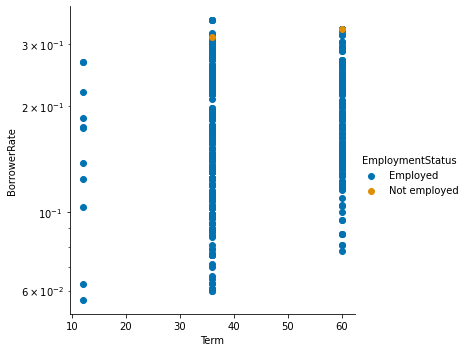

In [76]:
def Plot_E():
    Loan_status=Loans_Clean[Loans_Clean['EmploymentStatus'].isin(['Employed','Not employed'])]
    sample=np.random.choice(Loan_status.shape[0], 500, replace=False)
    Loan_Emp_df=Loan_status.iloc[sample]
    
    g=sns.FacetGrid(data=Loan_Emp_df, hue='EmploymentStatus',size=5, palette='colorblind')
    g.map(plt.scatter, 'Term', 'BorrowerRate')
    g.set(yscale='log')
    #y_ticks=np.arange(0,Loans_Clean['BorrowerRate'].max()+0.1,0.1 )
    #y_label=['{}'.format(v) for v in y_ticks]
    
    
    g.add_legend()
Plot_E()

- I used a log scale transformation for Borrower Rate.
- based on the sample i used so that the data points will not be too much, it is obvious that those who are not employed with loan term between 30 and 40 have borrowwer rate above 0.3 and those with loan term of 60  are also above 0.3.
- The loan terms seem to be more vertivcaly linear across each loan terms

## Question 14 ()

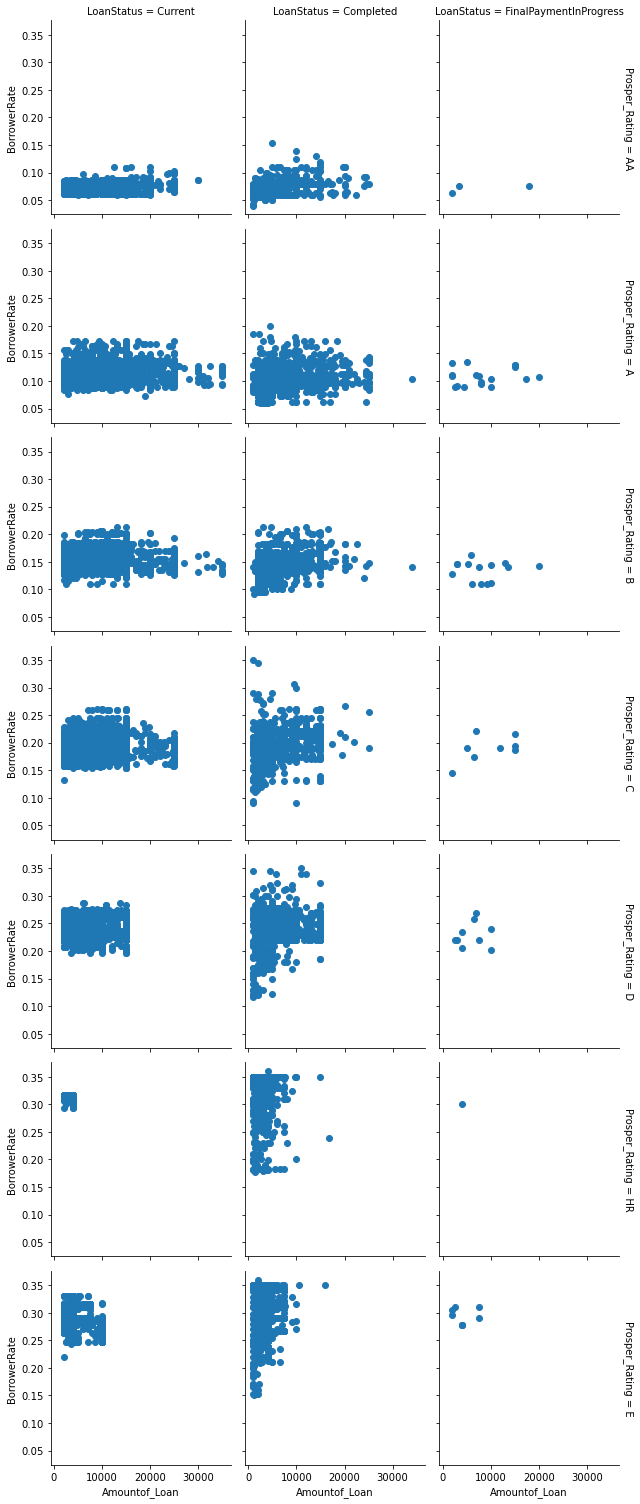

In [77]:
def Facet_status():
    Loan_status=Loans_Clean[Loans_Clean['LoanStatus'].isin(['Current','Completed','FinalPaymentInProgress'])]
    g=sns.FacetGrid(data=Loan_status, col='LoanStatus', row='Prosper_Rating', margin_titles=True)
    g.map(plt.scatter, 'Amountof_Loan','BorrowerRate')
Facet_status()
    

- I have restricted the loan status to just three in oredr to be more specific.
- Borrowers with loan status of "Current" and Rating of E have clusters between borrower rate of 0.25 and 0.35
- Borrowers with loan status of "Current" and Rating of HR have clusters mostly likely at 0.30
- Borrowers with loan status of "Current" and Rating of D have clusters between borrower rate of 0.20 and 0.30
- Borrowers with loan status of "Current" and Rating of c have clusters between borrower rate of 0.15 and 0.25
- Borrowers with loan status of "Current" and Rating of B have clusters between borrower rate of 0.10 and 0.20
- Borrowers with loan status of "Current" and Rating of A have clusters between borrower rate of 0.05 and 0.15
- Borrowerswith loan status of "COmplted" in comparison to the Prosper Rating have several clusters with relations to the rating on their loans.
-  Borrowerswith loan status of "Fian Payments in Progress" in comparison to the Prosper Rating have several clusters with relations to the rating on their loans.

In [78]:
Loans_Clean.head(2)

,Dateof_Listing,Term,LoanStatus,BorrowerRate,Prosper_Rating,Listing,Occupation,EmploymentStatus,HomeOwner,DelinquenciesLast7Years,MonthlyIncome,LoanKey,OnTimeProsperPayments,Amountof_Loan
4,2013-09-14 18:38:39.097,36,Current,0.2085,D,2,Executive,Employed,True,0.0,9583.333333,A180369302188889200689E,11.0,15000
16,2013-07-16 12:42:48.680,60,Current,0.2809,E,6,Professional,Full-time,True,12.0,8291.666667,2C78368704199057024A715,67.0,4000


## Question 15 ( How does being a home owner affect Loan Status and Interest on Loan Borrrowed?)

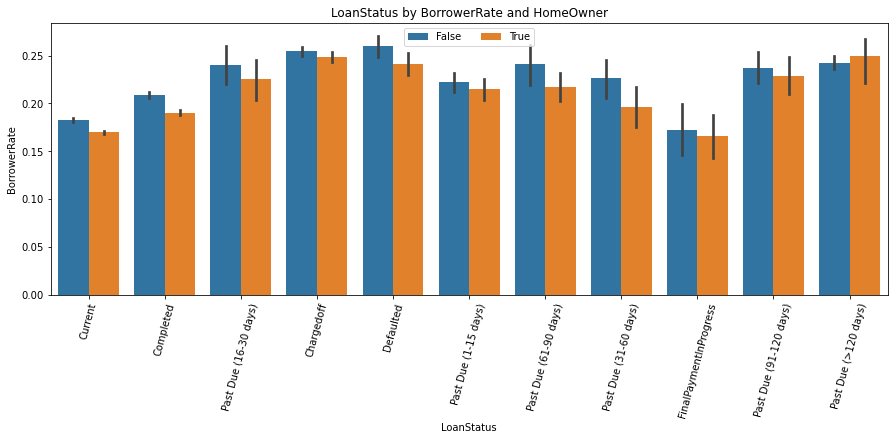

In [86]:
plt.figure(figsize=[15,5])

sns.barplot(data=Loans_Clean,x='LoanStatus',y='BorrowerRate', hue='HomeOwner' )
plt.xticks(rotation=75)
plt.legend(loc=9, ncol=2)
plt.title('LoanStatus by BorrowerRate and HomeOwner');


- Borrowers who are still paying currently with No home are more than those who have home and, those with no home have a higher interest rate on their loans than those with home.
- Those who have completed loan payment and have home are also lesser than those who do not and also have lesser interest rate on their loans.
- Looking carefullt at all the loan status it is obvious that in each section borrowers who are home owners are lesser than those who do not have homes and those who have homes have lesser interest rating on their loans than those who have no home.

## Observations From Multivariate Exploration
> For the first plot, i stricted loan status to just Current and complete so that i can have more specific analysis and give a probabilistic generalisation, in order to show my third variable, used shape because it is a categorical varaible and i prefer shape as it is proper than size which is applicable to numerical variables.
The plot also shows that there seems to be more borrowers who are still currently paying their loans compared to those who have completed it. Although for both  cases, i observed outliers and am going to remove this because of the impact it will have on my machine learning model which i will be building later on.
I used size to show the numerical varible in the next regression plot because as i said earlier it is proper to use size for a numerical variable.
and it is obvious nost likely that .
From the Facetgrid of question 14, i showed the loan status of borrowers,for those who are still paying, those who have completed payment and those who are making final payments, their respective loan Amounts and respective Ratings.
I noticed that Those with Loan Status of "Final Paymemts in Progress" have very little clusters across each ratings while those with Current and Completed loan status are more .
Lastly, The last bar chart where i showed the Interest rate on borrowers and their loan status for those who have home and those who do not, i think there was no need for any transformation since the analysis is clear that there are more borrowers with no homes than with homes.

In [80]:
#save the data for modeling later
Loans_Clean.to_csv('Loan_df.csv')

<a id='conclusions'></a>
## Conclusions
> Generally there are more home owners than those who do not have home but this does not really have impact on whether a borrower will pay back a loan or not because there are also a lot of non home owners who have completed their loans.
It is also clear that Borower rate has impact on Loan Status because there is more interest on the Loan Amount of those who have no Homes and those who do not have home.
From one of the scatter plot, i saw that borrowers who even have higher monthly income and have not finished payments are  more than those who have completed payments and have lower monthly income by samll margin, which ,means that only the monthly income does not tell if a borrower will pay back or not, we must also look at the amount of loan given to the borrowers.
I also noticed that borrowers who are currently paying and completed payment and which have a higher Prosper Rating are those who have lesser Interest Rate on their Loan Amounts.
Where i used the groupby clause to show the Average monthly income of Borrowers Loan status, i saw that those whose final payment is in progress have the highest average monthly income even than those who have completed payment, hence, much more than income of borrwers , there are still some additional factors that contribute to why some have not paid back.


## Recommendation
> I suggest that beyong just the features , there is an attitude part on the side of the borrowers on whetherto pay or not and i think banks or institutions that lend borrowers money show call their clients and ask them why sincerely ahve not paid.
Also Institutions that leand money should not use the fact that a borrower said they are home owners or not to determine the amount of loan they can borrowe, because it is even obvious that people who are not home owners and have completed their loan payments are more than those who have not completed payment.
In addition the Interest  on borrowers who have lower Monthly Income should be reduced and their loan term should be a little bit extended.
Finally i could see that There are more borrowers who are employed with a percentage of 63%, which means that if they are well paid in their place of work, they should be able to complete their payment on time, whereas a lot have not still paid, hence , this means the Loan Lending Institutions cannot just rely on whether a borrower is employed or not but also consider if they are getting consistent payment at their places of work or not and compare that amount of loan they are requesting with their income.

## References
> Alx udacity workspace, stack overflow, youtube, python documentation.